# Logistic Regression 

***

Logistic Regression was developed to predict the probability of default within a loan portfolio, where default = 1 indicates the a customer has failed to pay the loan obligation while default = 0 reprsents customers who are able to repay their loans. 

The model assigns a credit score to new loan applicants. Applicants with a higher score, representing lower credit risk, who are more likely to be eligible for a loan. Meanwhile, for those customers with lower score, indicating higher credit risk, may face rejection. 

To enhance the model performance, the Weight of Evidence (WOE) methodonlogy was used to transform and standardize the variables, ensuring better predictive power. Morevoer, Points-to-Double-the-Odds (PDO) approach was used to scale the credit score, for more interpretable and consistent. 

The model can be used for credit adjudication, pricing model and line assignment. 

***

In [1]:
# input library

import pandas as pd
import numpy as np 
import pickle
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from scipy.stats import ks_2samp # for KS calculation
from sklearn.metrics import roc_auc_score # for GINI calculation

***

# Step 1: Input and understand the raw dataset

***

In [2]:
# input raw data
df = pd.read_csv("E:\Study\Project\Loan Default Analysis\Loan_default.csv\Loan_default.csv") 

In [3]:
# check data structure and variables 
print(df.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

In [4]:
#check the value of categories variables
cat_var = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose']

for x in cat_var:
    print(df[x].value_counts())

Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: Education, dtype: int64
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: EmploymentType, dtype: int64
Married     85302
Divorced    85033
Single      85012
Name: MaritalStatus, dtype: int64
Yes    127677
No     127670
Name: HasMortgage, dtype: int64
Yes    127742
No     127605
Name: HasDependents, dtype: int64
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: LoanPurpose, dtype: int64


In [5]:
#transform the categorical variables to numeric 
df['Education_Num'] = df['Education'].replace({'High School': 0, "Bachelor's": 1, "Master's": 2, "PhD": 3})
df['EmploymentType_Num'] = df['EmploymentType'].replace({'Unemployed': 0, 'Part-time': 1, 'Self-employed': 2, 'Full-time': 3})
df['MaritalStatus_Num'] = df['MaritalStatus'].replace({'Single': 0, 'Married': 1, 'Divorced': 2})
df['HasMortgage_Num'] = df['HasMortgage'].replace({'No': 0, 'Yes': 1})
df['HasDependents_Num'] = df['HasDependents'].replace({'No': 0, 'Yes': 1})
df['LoanPurpose_Num'] = df['LoanPurpose'].replace({'Other': 0, 'Business': 1, 'Home': 2, 'Education': 3, 'Auto': 4})

print (df['Education_Num'].value_counts())
print (df['EmploymentType_Num'].value_counts())
print (df['MaritalStatus_Num'].value_counts())
print (df['HasMortgage_Num'].value_counts())
print (df['HasDependents_Num'].value_counts())
print (df['LoanPurpose_Num'].value_counts())

1    64366
0    63903
2    63541
3    63537
Name: Education_Num, dtype: int64
1    64161
0    63824
2    63706
3    63656
Name: EmploymentType_Num, dtype: int64
1    85302
2    85033
0    85012
Name: MaritalStatus_Num, dtype: int64
1    127677
0    127670
Name: HasMortgage_Num, dtype: int64
1    127742
0    127605
Name: HasDependents_Num, dtype: int64
1    51298
2    51286
3    51005
0    50914
4    50844
Name: LoanPurpose_Num, dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   LoanID              255347 non-null  object 
 1   Age                 255347 non-null  int64  
 2   Income              255347 non-null  int64  
 3   LoanAmount          255347 non-null  int64  
 4   CreditScore         255347 non-null  int64  
 5   MonthsEmployed      255347 non-null  int64  
 6   NumCreditLines      255347 non-null  int64  
 7   InterestRate        255347 non-null  float64
 8   LoanTerm            255347 non-null  int64  
 9   DTIRatio            255347 non-null  float64
 10  Education           255347 non-null  object 
 11  EmploymentType      255347 non-null  object 
 12  MaritalStatus       255347 non-null  object 
 13  HasMortgage         255347 non-null  object 
 14  HasDependents       255347 non-null  object 
 15  LoanPurpose         255347 non-nul

In [7]:
#check any null value 
df.isnull().sum()

LoanID                0
Age                   0
Income                0
LoanAmount            0
CreditScore           0
MonthsEmployed        0
NumCreditLines        0
InterestRate          0
LoanTerm              0
DTIRatio              0
Education             0
EmploymentType        0
MaritalStatus         0
HasMortgage           0
HasDependents         0
LoanPurpose           0
HasCoSigner           0
Default               0
Education_Num         0
EmploymentType_Num    0
MaritalStatus_Num     0
HasMortgage_Num       0
HasDependents_Num     0
LoanPurpose_Num       0
dtype: int64

***

# Step 2: Croast Classing and Fine Classing by using WOE and IV

***

*** 

## Step 2.1 Croast Classing by using 10 classes for preliminary checking

***


In [8]:
# Function to calculate WOE and IV

def calculate_woe_iv(data, feature, target, bins=None):
    if bins:
        data[feature + '_bin'] = pd.cut(data[feature], bins=bins, duplicates='drop')
    else:
        data[feature + '_bin'] = pd.qcut(data[feature], q=5, duplicates='drop')

    woe_table = data.groupby(feature + '_bin').agg(
        good_count=(target, lambda x: (x == 0).sum()),
        bad_count=(target, lambda x: (x == 1).sum())
    )

    woe_table['total'] = woe_table['good_count'] + woe_table['bad_count']
    woe_table['bad_rate'] = woe_table['bad_count'] / woe_table['total']

    # WOE & IV Calculation
    woe_table['good_dist'] = woe_table['good_count'] / woe_table['good_count'].sum()
    woe_table['bad_dist'] = woe_table['bad_count'] / woe_table['bad_count'].sum()
    woe_table['total_dist'] = woe_table['total'] / woe_table['total'].sum()
    
    woe_table['WOE'] = np.log(woe_table['good_dist'] / woe_table['bad_dist'])
    woe_table['IV'] = (woe_table['good_dist'] - woe_table['bad_dist']) * woe_table['WOE']

    woe_dict = woe_table['WOE'].to_dict()
    
    print(f"\nWOE Table for {feature}:")
    print(woe_table)
    
    print(f"\nIV Table for {feature}:")
    print(woe_table['IV'].sum())
    
    print(f"\nWOE DICT for {feature}:")
    print(woe_dict)
    
    return woe_table, woe_dict, woe_table['IV'].sum()


In [10]:
# Apply WOE Transformation to check useful variables
woe_dicts = {}
ivs = {}
for feature in ['Income', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'DTIRatio', 'Age', 'EmploymentType_Num', 
                'MaritalStatus_Num', 'HasMortgage_Num', 'HasDependents_Num', 'LoanPurpose_Num']:
    woe_table, woe_dict, iv = calculate_woe_iv(df, feature, 'Default', bins = 10)
    woe_dicts[feature] = woe_dict
    ivs[feature] = iv



WOE Table for Income:
                      good_count  bad_count  total  bad_rate  good_dist  \
Income_bin                                                                
(14865.001, 28499.9]       19860       5753  25613  0.224613   0.087995   
(28499.9, 41999.8]         21700       3711  25411  0.146039   0.096148   
(41999.8, 55499.7]         22424       3042  25466  0.119453   0.099356   
(55499.7, 68999.6]         22774       2758  25532  0.108021   0.100907   
(68999.6, 82499.5]         23160       2567  25727  0.099778   0.102617   
(82499.5, 95999.4]         22993       2487  25480  0.097606   0.101877   
(95999.4, 109499.3]        23068       2398  25466  0.094165   0.102209   
(109499.3, 122999.2]       23284       2362  25646  0.092100   0.103166   
(122999.2, 136499.1]       23124       2315  25439  0.091002   0.102457   
(136499.1, 149999.0]       23307       2260  25567  0.088395   0.103268   

                      bad_dist  total_dist       WOE        IV  
Income_bin 


WOE Table for DTIRatio:
                good_count  bad_count  total  bad_rate  good_dist  bad_dist  \
DTIRatio_bin                                                                  
(0.0992, 0.18]       24201       2838  27039  0.104960   0.107229  0.095707   
(0.18, 0.26]         22731       2714  25445  0.106661   0.100716  0.091525   
(0.26, 0.34]         19874       2501  22375  0.111777   0.088057  0.084342   
(0.34, 0.42]         25604       3259  28863  0.112913   0.113446  0.109905   
(0.42, 0.5]          22474       3022  25496  0.118528   0.099577  0.101912   
(0.5, 0.58]          22365       2974  25339  0.117368   0.099094  0.100293   
(0.58, 0.66]         22555       3069  25624  0.119771   0.099936  0.103497   
(0.66, 0.74]         22423       3174  25597  0.123999   0.099351  0.107038   
(0.74, 0.82]         22462       3195  25657  0.124527   0.099524  0.107746   
(0.82, 0.9]          21005       2907  23912  0.121571   0.093068  0.098034   

                total_dist


WOE Table for HasMortgage_Num:
                     good_count  bad_count   total  bad_rate  good_dist  \
HasMortgage_Num_bin                                                       
(-0.001, 0.1]            111909      15761  127670  0.123451   0.495844   
(0.1, 0.2]                    0          0       0       NaN   0.000000   
(0.2, 0.3]                    0          0       0       NaN   0.000000   
(0.3, 0.4]                    0          0       0       NaN   0.000000   
(0.4, 0.5]                    0          0       0       NaN   0.000000   
(0.5, 0.6]                    0          0       0       NaN   0.000000   
(0.6, 0.7]                    0          0       0       NaN   0.000000   
(0.7, 0.8]                    0          0       0       NaN   0.000000   
(0.8, 0.9]                    0          0       0       NaN   0.000000   
(0.9, 1.0]               113785      13892  127677  0.108806   0.504156   

                     bad_dist  total_dist       WOE        IV  
Has


*** 
### Observation: 

According to the bad rate distribution and IV values of above variables, below variables with strong risk ranking and higher IV values including

 - Income 
 - CreditScore 
 - MonthsEmployed
 - Age 
 - EmploymentType_Num and 
 - HasDependents_Num 

are potentially useful for the model development. 

*** 


***

## Step 2.2 Correlation Checking

***

In [11]:
# Variables - Income 

for feature in ['CreditScore', 'MonthsEmployed', 'Age', 'EmploymentType_Num', 'HasDependents_Num']:
    df['Income'].corr(df[feature])
    print(f"corr for income with {feature}:")
    print(df['Income'].corr(df[feature]))
    


corr for income with CreditScore:
-0.0014304474455626654
corr for income with MonthsEmployed:
0.0026748769580619757
corr for income with Age:
-0.0012440951772180052
corr for income with EmploymentType_Num:
0.005479318470819694
corr for income with HasDependents_Num:
-0.0015696292473936445


In [12]:
# Variables - CreditScore

for feature in ['MonthsEmployed', 'Age', 'EmploymentType_Num', 'HasDependents_Num']:
    df['CreditScore'].corr(df[feature])
    print(f"corr for CreditScore with {feature}:")
    print(df['CreditScore'].corr(df[feature]))

corr for CreditScore with MonthsEmployed:
0.0006128272709389606
corr for CreditScore with Age:
-0.0005481708896708506
corr for CreditScore with EmploymentType_Num:
-0.002680294990017912
corr for CreditScore with HasDependents_Num:
-0.0030179318482109817


In [13]:
# Variables - MonthsEmployed

for feature in ['Age', 'EmploymentType_Num', 'HasDependents_Num']:
    df['MonthsEmployed'].corr(df[feature])
    print(f"corr for MonthsEmployed with {feature}:")
    print(df['MonthsEmployed'].corr(df[feature]))

corr for MonthsEmployed with Age:
-0.00034138798341614503
corr for MonthsEmployed with EmploymentType_Num:
-0.0008305306603244125
corr for MonthsEmployed with HasDependents_Num:
0.0014496560351499681


In [14]:
# Variables - Age

for feature in ['EmploymentType_Num', 'HasDependents_Num']:
    df['Age'].corr(df[feature])
    print(f"corr for Age with {feature}:")
    print(df['Age'].corr(df[feature]))

corr for Age with EmploymentType_Num:
0.0002131066854972421
corr for Age with HasDependents_Num:
0.0007102764898991739


In [15]:
# Variables - EmploymentType_Num

for feature in ['HasDependents_Num']:
    df['EmploymentType_Num'].corr(df[feature])
    print(f"corr for EmploymentType_Num with {feature}:")
    print(df['EmploymentType_Num'].corr(df[feature]))

corr for EmploymentType_Num with HasDependents_Num:
-0.0016832133158378544


***
### Observation:

***
The correlation coefficient is low among all variables, indicating no significant correlation among variables. All variables can be used in model development. 

***


***

## Step 2.3 Fine Classing on the Useful Variables

***

In [16]:
# Apply WOE Transformation & Save Rules
woe_dicts = {}
ivs = {}

for feature in ['Income', 'CreditScore', 'MonthsEmployed', 'Age', 'EmploymentType_Num', 'HasDependents_Num']:
    woe_table, woe_dict, iv = calculate_woe_iv(df, feature, 'Default', bins = 5)
    woe_dicts[feature] = woe_dict
    ivs[feature] = iv
    
# Save WOE mappings
with open('woe_mappings.pkl', 'wb') as f:
    pickle.dump(woe_dicts, f)


WOE Table for Income:
                      good_count  bad_count  total  bad_rate  good_dist  \
Income_bin                                                                
(14865.001, 41999.8]       41560       9464  51024  0.185481   0.184143   
(41999.8, 68999.6]         45198       5800  50998  0.113730   0.200262   
(68999.6, 95999.4]         46153       5054  51207  0.098697   0.204494   
(95999.4, 122999.2]        46352       4760  51112  0.093129   0.205375   
(122999.2, 149999.0]       46431       4575  51006  0.089695   0.205725   

                      bad_dist  total_dist       WOE        IV  
Income_bin                                                      
(14865.001, 41999.8]  0.319158    0.199822 -0.549974  0.074255  
(41999.8, 68999.6]    0.195596    0.199720  0.023578  0.000110  
(68999.6, 95999.4]    0.170438    0.200539  0.182165  0.006204  
(95999.4, 122999.2]   0.160523    0.200167  0.246400  0.011052  
(122999.2, 149999.0]  0.154285    0.199752  0.287744  0.01480

***

## Observation:

Since variables EmploymentType_Num and HasDependents_Num have null WOE for some binning, custom binning is required. 

***


In [17]:
# Custom Binning - EmploymentType_Num
 
#define customer bins
custom_bins = [-0.5, 0.5, 2.5, 3.5]

for feature in ['EmploymentType_Num']:
    woe_table, woe_dict, iv = calculate_woe_iv(df, feature, 'Default', bins = custom_bins)
    woe_dicts[feature] = woe_dict
    ivs[feature] = iv
    
# Save WOE mappings
with open('woe_mappings.pkl', 'wb') as f:
    pickle.dump(woe_dicts, f)


WOE Table for EmploymentType_Num:
                        good_count  bad_count   total  bad_rate  good_dist  \
EmploymentType_Num_bin                                                       
(-0.5, 0.5]                  55174       8650   63824  0.135529   0.244464   
(0.5, 2.5]                  112888      14979  127867  0.117145   0.500182   
(2.5, 3.5]                   57632       6024   63656  0.094634   0.255355   

                        bad_dist  total_dist       WOE        IV  
EmploymentType_Num_bin                                            
(-0.5, 0.5]             0.291707    0.249950 -0.176684  0.008347  
(0.5, 2.5]              0.505143    0.500758 -0.009870  0.000049  
(2.5, 3.5]              0.203150    0.249292  0.228710  0.011940  

IV Table for EmploymentType_Num:
0.020335930557846618

WOE DICT for EmploymentType_Num:
{Interval(-0.5, 0.5, closed='right'): -0.17668429186099513, Interval(0.5, 2.5, closed='right'): -0.009869842176454853, Interval(2.5, 3.5, closed='righ

In [18]:
# Custom Binning - HasDependents
 
#define customer bins
custom_bins = [-0.5, 0.5, 1.5]

for feature in ['HasDependents_Num']:
    woe_table, woe_dict, iv = calculate_woe_iv(df, feature, 'Default', bins = custom_bins)
    woe_dicts[feature] = woe_dict
    ivs[feature] = iv
    
# Save WOE mappings
with open('woe_mappings.pkl', 'wb') as f:
    pickle.dump(woe_dicts, f)


WOE Table for HasDependents_Num:
                       good_count  bad_count   total  bad_rate  good_dist  \
HasDependents_Num_bin                                                       
(-0.5, 0.5]                111368      16237  127605  0.127244   0.493447   
(0.5, 1.5]                 114326      13416  127742  0.105024   0.506553   

                       bad_dist  total_dist       WOE        IV  
HasDependents_Num_bin                                            
(-0.5, 0.5]            0.547567    0.499732 -0.104069  0.005632  
(0.5, 1.5]             0.452433    0.500268  0.112989  0.006115  

IV Table for HasDependents_Num:
0.01174720365000519

WOE DICT for HasDependents_Num:
{Interval(-0.5, 0.5, closed='right'): -0.10406935426404368, Interval(0.5, 1.5, closed='right'): 0.11298919323284506}


In [19]:
# check the woe mapping is stored properly

for feature, mapping in woe_dicts.items():
    print(f"\nFeature: {feature}")
    for bin_range, woe_value in mapping.items():
        print(f"Bin Type: {type(bin_range)}, Bin: {bin_range}, WOE: {woe_value}")



Feature: Income
Bin Type: <class 'pandas._libs.interval.Interval'>, Bin: (14865.001, 41999.8], WOE: -0.5499737591903914
Bin Type: <class 'pandas._libs.interval.Interval'>, Bin: (41999.8, 68999.6], WOE: 0.023578121773906627
Bin Type: <class 'pandas._libs.interval.Interval'>, Bin: (68999.6, 95999.4], WOE: 0.1821651565418839
Bin Type: <class 'pandas._libs.interval.Interval'>, Bin: (95999.4, 122999.2], WOE: 0.2463999740383335
Bin Type: <class 'pandas._libs.interval.Interval'>, Bin: (122999.2, 149999.0], WOE: 0.2877438421259153

Feature: CreditScore
Bin Type: <class 'pandas._libs.interval.Interval'>, Bin: (299.451, 409.8], WOE: -0.1468406831118797
Bin Type: <class 'pandas._libs.interval.Interval'>, Bin: (409.8, 519.6], WOE: -0.0585824198789386
Bin Type: <class 'pandas._libs.interval.Interval'>, Bin: (519.6, 629.4], WOE: 0.001491095549991652
Bin Type: <class 'pandas._libs.interval.Interval'>, Bin: (629.4, 739.2], WOE: 0.07816899449896529
Bin Type: <class 'pandas._libs.interval.Interval'>, B

In [20]:
# Load WOE mappings & Model
with open('woe_mappings.pkl', 'rb') as f:
    woe_dicts = pickle.load(f)

# Ensure bins remain exactly as stored
for feature in woe_dicts.keys():
    woe_dicts[feature] = {pd.Interval(interval.left, interval.right, closed='right'): woe for interval, woe in woe_dicts[feature].items()}

# Function to assign bins manually
def assign_bin(value, bin_intervals):
    """Manually assign a value to a bin without letting pandas modify bin edges."""
    for interval in bin_intervals:
        if value in interval:
            return interval
    return None  # Return None if no bin matches

# Assign WOE values to dataset
for feature in woe_dicts.keys():
    if feature in df.columns:
        bins = list(woe_dicts[feature].keys())

        # Manually assign bins instead of using pd.cut()
        df[feature + '_bin'] = df[feature].apply(lambda x: assign_bin(x, bins))

        # Map WOE values
        df[feature + '_woe'] = df[feature + '_bin'].map(woe_dicts[feature])



In [21]:
# Debugging: Check the output
print(df[['Age', 'Age_bin', 'Age_woe']].head())

   Age       Age_bin   Age_woe
0   56  (48.6, 58.8]  0.467922
1   69  (58.8, 69.0]  0.874602
2   46  (38.4, 48.6]  0.125599
3   32  (28.2, 38.4] -0.268655
4   60  (58.8, 69.0]  0.874602


In [22]:
#check any null value 
df.isnull().sum()

LoanID                    0
Age                       0
Income                    0
LoanAmount                0
CreditScore               0
MonthsEmployed            0
NumCreditLines            0
InterestRate              0
LoanTerm                  0
DTIRatio                  0
Education                 0
EmploymentType            0
MaritalStatus             0
HasMortgage               0
HasDependents             0
LoanPurpose               0
HasCoSigner               0
Default                   0
Education_Num             0
EmploymentType_Num        0
MaritalStatus_Num         0
HasMortgage_Num           0
HasDependents_Num         0
LoanPurpose_Num           0
Income_bin                0
CreditScore_bin           0
MonthsEmployed_bin        0
NumCreditLines_bin        0
DTIRatio_bin              0
Age_bin                   0
EmploymentType_Num_bin    0
MaritalStatus_Num_bin     0
HasMortgage_Num_bin       0
HasDependents_Num_bin     0
LoanPurpose_Num_bin       0
Income_woe          

In [23]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,MaritalStatus_Num_bin,HasMortgage_Num_bin,HasDependents_Num_bin,LoanPurpose_Num_bin,Income_woe,CreditScore_woe,MonthsEmployed_woe,Age_woe,EmploymentType_Num_woe,HasDependents_Num_woe
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,"(1.8, 2.0]","(0.9, 1.0]","(0.5, 1.5]","(-0.004, 0.4]",0.182165,0.001491,0.236490,0.467922,0.228710,0.112989
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,"(0.8, 1.0]","(-0.001, 0.1]","(-0.5, 0.5]","(-0.004, 0.4]",0.023578,-0.058582,-0.388872,0.874602,0.228710,-0.104069
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,"(1.8, 2.0]","(0.9, 1.0]","(0.5, 1.5]","(3.6, 4.0]",0.182165,-0.058582,-0.186590,0.125599,-0.176684,0.112989
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,"(0.8, 1.0]","(-0.001, 0.1]","(-0.5, 0.5]","(0.8, 1.2]",-0.549974,0.147246,-0.388872,-0.268655,0.228710,-0.104069
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,"(1.8, 2.0]","(-0.001, 0.1]","(0.5, 1.5]","(3.6, 4.0]",-0.549974,0.078169,-0.388872,0.874602,-0.176684,0.112989


***

### Observation:

All variables have been binned properly and WOE values have been assinged to raw dataset according to the binning value. 

***


***

## Step 3: Select the Potential Variables for Model Development

***

In [24]:
# Define Features & Target
X = df[['Income_woe', 'CreditScore_woe', 'MonthsEmployed_woe', 'Age_woe', 'EmploymentType_Num_woe', 'HasDependents_Num_woe']]
y = df['Default']

*** 

## Step 4: Split the Dataset to Train and Test Dataset 

***


In [25]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***

## Step 5: Model Development 

***

In [26]:
# Train Model
model = LogisticRegression()
model.fit(X_train, y_train)


# Save Model
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)

***

## Step 6: Model Performance Evaluation by using KS and GINI

***

In [27]:
#train sample

#predict the bad probabilities
y_train_pred = model.predict_proba(X_train)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_train, y_train_pred)


# compute KS statistics
def ks_statistic(y_true, y_pred):
    """Calculate KS statistic."""
    good_probs = y_pred[y_true == 0]  # Non-default group
    bad_probs = y_pred[y_true == 1]   # Default group
    ks_stat, _ = ks_2samp(good_probs, bad_probs)
    return ks_stat


# Compute GINI Coefficient
def gini_coefficient(y_true, y_pred):
    """Calculate GINI coefficient."""
    auc = roc_auc_score(y_true, y_pred)
    return 2 * auc - 1


# Calculate KS and GINI
ks_value = ks_statistic(y_train, y_train_pred)
gini_value = gini_coefficient(y_train, y_train_pred)

print(f"Model Performance - Train Sample:")
print(f"AUC: {auc:.4f}")
print(f"KS Statistic: {ks_value:.4f}")
print(f"GINI Coefficient: {gini_value:.4f}")


Model Performance - Train Sample:
AUC: 0.7006
KS Statistic: 0.2947
GINI Coefficient: 0.4011


In [28]:
#test sample
y_test_pred = model.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_test_pred)

# Calculate KS and GINI
ks_value = ks_statistic(y_test, y_test_pred)
gini_value = gini_coefficient(y_test, y_test_pred)

print(f"Model Performance - Test Sample:")
print(f"AUC: {auc:.4f}")
print(f"KS Statistic: {ks_value:.4f}")
print(f"GINI Coefficient: {gini_value:.4f}")


Model Performance - Test Sample:
AUC: 0.7025
KS Statistic: 0.3033
GINI Coefficient: 0.4050


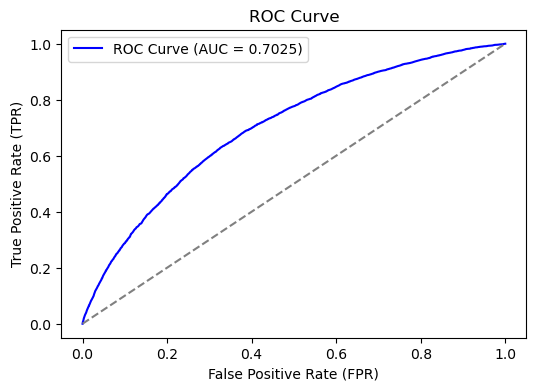

In [29]:
#Plot ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


***

### Observation: 

KS and GINI meet the performance standard and consistent for both train and test sample, indicating strong and stable model performance. 

***

***

## Step 7: Transform the PD to Score Points 

***

In [30]:
# assign a score based on the points double odds 

def pd_to_pdo_score(pd, base_score=600, pdo=20):
    """Convert probability of default (PD) to a credit score using PDO method."""
   
    odds = (1-pd)/pd
    log_odds = np.log(odds)
     
    score = base_score + (log_odds / np.log(2)) * pdo  # Apply PDO formula
    return score
 
# Predict default probability
prob_defaults = model.predict_proba(X)[:, 1]

# Convert probabilities to credit scores
credit_scores = [pd_to_pdo_score(pd) for pd in prob_defaults]

# Append scores to dataset
df['PD'] = prob_defaults
df['credit_scores'] = credit_scores

In [31]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasDependents_Num_bin,LoanPurpose_Num_bin,Income_woe,CreditScore_woe,MonthsEmployed_woe,Age_woe,EmploymentType_Num_woe,HasDependents_Num_woe,PD,credit_scores
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,"(0.5, 1.5]","(-0.004, 0.4]",0.182165,0.001491,0.236490,0.467922,0.228710,0.112989,0.035018,695.686960
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,"(-0.5, 0.5]","(-0.004, 0.4]",0.023578,-0.058582,-0.388872,0.874602,0.228710,-0.104069,0.067636,675.700483
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,"(0.5, 1.5]","(3.6, 4.0]",0.182165,-0.058582,-0.186590,0.125599,-0.176684,0.112989,0.116876,658.352640
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,"(-0.5, 0.5]","(0.8, 1.2]",-0.549974,0.147246,-0.388872,-0.268655,0.228710,-0.104069,0.256147,630.760952
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,"(0.5, 1.5]","(3.6, 4.0]",-0.549974,0.078169,-0.388872,0.874602,-0.176684,0.112989,0.123744,656.479824


***

## Step 8: Portfolio Binning for Score Distribution 

***

            score_bin  Population %  Bad Rate
0  (597.821, 636.003]     10.010300  0.285748
1  (636.003, 645.521]     10.019699  0.196521
2  (645.521, 652.608]      9.987194  0.156380
3  (652.608, 658.728]      9.997376  0.128095
4  (658.728, 664.627]      9.987194  0.107560
5  (664.627, 670.704]     10.036930  0.084787
6  (670.704, 677.052]      9.964088  0.070943
7  (677.052, 684.034]     10.002467  0.056145
8  (684.034, 693.197]     10.027140  0.045266
9  (693.197, 722.157]      9.967613  0.029428


C:\Users\keung_000\AppData\Local\Temp\ipykernel_21540\1435653653.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(bin_stats['score_bin'], rotation=45)


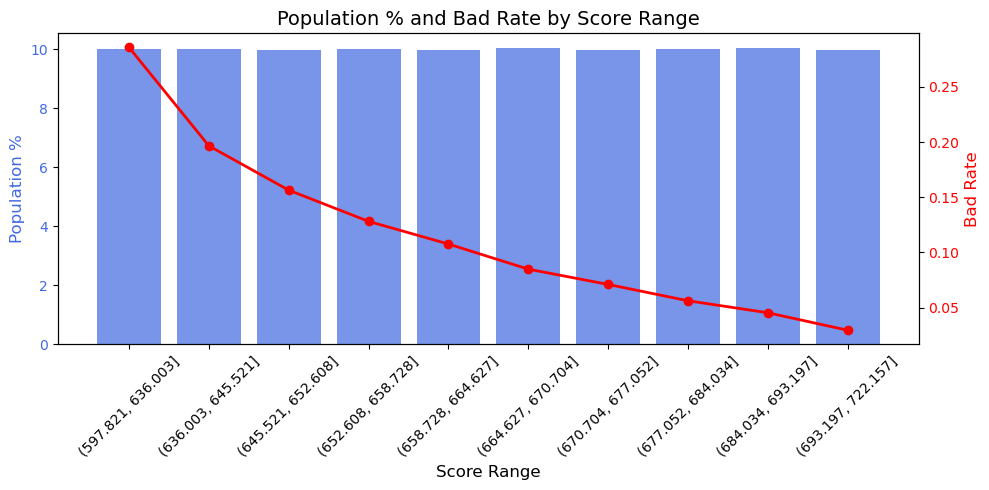

In [32]:
# Create 10 equal-sized bins based on score
df['score_bin'] = pd.qcut(df['credit_scores'], q=10, duplicates='drop')

# Group by bin and calculate statistics
bin_stats = df.groupby('score_bin').agg(
    total_count=('Default', 'count'),
    bad_count=('Default', 'sum'))

# Calculate Population% and Bad Rate
bin_stats['Population %'] = bin_stats['total_count'] / bin_stats['total_count'].sum() * 100
bin_stats['Bad Rate'] = bin_stats['bad_count'] / bin_stats['total_count']

# Reset index for readability
bin_stats = bin_stats.reset_index()
bin_stats['score_bin'] = bin_stats['score_bin'].astype(str)

# Print pop% and bad rate% table by score bin
print(bin_stats[['score_bin', 'Population %', 'Bad Rate']])

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart for Population %
ax1.bar(bin_stats['score_bin'], bin_stats['Population %'], color='royalblue', alpha=0.7, label="Population %")
ax1.set_ylabel('Population %', color='royalblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.set_xlabel('Score Range', fontsize=12)
ax1.set_xticklabels(bin_stats['score_bin'], rotation=45)

# Line plot for Bad Rate
ax2 = ax1.twinx()
ax2.plot(bin_stats['score_bin'], bin_stats['Bad Rate'], color='red', marker='o', linestyle='-', linewidth=2, label="Bad Rate")
ax2.set_ylabel('Bad Rate', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Title & Legend
plt.title('Population % and Bad Rate by Score Range', fontsize=14)
fig.tight_layout()
plt.show()

***

### Observation:

The risk ranking power is strong across the population distribution. A higher score corresponds to a lower default rate, while a lower score indicates a higher default rate. It showed the model can discriminate the risk level of population effectively. 

*** 

***

## Step 9 Implementation of Score 

*** 


In [33]:
#output intercept and coefficient of the model

coefficients = model.coef_[0] 
intercept = model.intercept_[0]

print(coefficients, intercept)

feature_names = X.columns

equation = f"Logistic Regression Equation:\nlogit(P) = {intercept:.4f} " + " + ".join([f"{coef:.4f}*{feature}" for coef, feature in zip(coefficients, feature_names)]) 
print(equation)

[-1.05281223 -1.06917731 -1.0345361  -1.02663744 -1.08671135 -1.06901979] -2.028504490522414
Logistic Regression Equation:
logit(P) = -2.0285 -1.0528*Income_woe + -1.0692*CreditScore_woe + -1.0345*MonthsEmployed_woe + -1.0266*Age_woe + -1.0867*EmploymentType_Num_woe + -1.0690*HasDependents_Num_woe


In [34]:
def score_new_applicant(applicant_data):
    """
    Score a new applicant using WOE transformation & logistic regression model.
    """
    # Load WOE mappings & Model
    with open('woe_mappings.pkl', 'rb') as f:
        woe_dicts = pickle.load(f)
    with open('logistic_model.pkl', 'rb') as f:
        model = pickle.load(f)
    
    # Convert interval keys to pd.Interval (ensuring right-closed intervals)
    for feature in woe_dicts.keys():
        woe_dicts[feature] = {pd.Interval(interval.left, interval.right, closed='right'): woe 
                              for interval, woe in woe_dicts[feature].items()}

    # Function to assign bins manually
    def assign_bin(value, bin_intervals):
        """Manually assign a value to a bin without letting pandas modify bin edges."""
        for interval in bin_intervals:
            if value in interval:
                return interval
        return None  # Return None if no bin matches

    # Assign WOE values to applicant data
    applicant_woe_data = {}  # Store transformed data
    for feature in woe_dicts.keys():
        bins = list(woe_dicts[feature].keys())

        # Assign bin
        bin_value = assign_bin(applicant_data[feature], bins)
        
        # Assign WOE value based on bin
        woe_value = woe_dicts[feature].get(bin_value, 0)  # Default to 0 if no match
        
        # Store WOE values
        applicant_woe_data[feature + '_woe'] = woe_value

        # Print assigned WOE value
        print(f"{feature}: Original Value = {applicant_data[feature]}, Bin = {bin_value}, WOE = {woe_value}")

    # Prepare Data for Prediction
    X_new = np.array([[applicant_woe_data.get('Income_woe', 0), 
                       applicant_woe_data.get('CreditScore_woe', 0), 
                       applicant_woe_data.get('MonthsEmployed_woe', 0), 
                       applicant_woe_data.get('Age_woe', 0), 
                       applicant_woe_data.get('EmploymentType_Num_woe', 0), 
                       applicant_woe_data.get('HasDependents_Num_woe', 0)]])

    # Predict Probability of Default (PD)
    pd_score = model.predict_proba(X_new)[:, 1][0]
    
    print(f"PD: {pd_score}")

    # Convert PD to Credit Score
    credit_score = pd_to_pdo_score(pd_score)

    return round(credit_score)


In [35]:
# for sample checking 
print(df[['Income', 'Income_woe', 'CreditScore', 'CreditScore_woe', 'MonthsEmployed','MonthsEmployed_woe', 
          'Age', 'Age_woe','HasDependents_Num', 'HasDependents_Num_woe', 'EmploymentType_Num', 'EmploymentType_Num_woe','PD', 'credit_scores']].head())

   Income  Income_woe  CreditScore  CreditScore_woe  MonthsEmployed  \
0   85994    0.182165          520         0.001491              80   
1   50432    0.023578          458        -0.058582              15   
2   84208    0.182165          451        -0.058582              26   
3   31713   -0.549974          743         0.147246               0   
4   20437   -0.549974          633         0.078169               8   

   MonthsEmployed_woe  Age   Age_woe  HasDependents_Num  \
0            0.236490   56  0.467922                  1   
1           -0.388872   69  0.874602                  0   
2           -0.186590   46  0.125599                  1   
3           -0.388872   32 -0.268655                  0   
4           -0.388872   60  0.874602                  1   

   HasDependents_Num_woe  EmploymentType_Num  EmploymentType_Num_woe  \
0               0.112989                   3                0.228710   
1              -0.104069                   3                0.228710   
2 

In [36]:
#Implementation sample checking: 

new_applicant = {'Income': 84208, 'CreditScore': 451, 'MonthsEmployed': 26, 'Age': 46, 'EmploymentType_Num': 0, 'HasDependents_Num': 1}
score = score_new_applicant(new_applicant)
print(f"Applicant's Credit Score: {score}")

Income: Original Value = 84208, Bin = (68999.6, 95999.4], WOE = 0.1821651565418839
CreditScore: Original Value = 451, Bin = (409.8, 519.6], WOE = -0.0585824198789386
MonthsEmployed: Original Value = 26, Bin = (23.8, 47.6], WOE = -0.18659028971085434
Age: Original Value = 46, Bin = (38.4, 48.6], WOE = 0.12559908925737617
EmploymentType_Num: Original Value = 0, Bin = (-0.5, 0.5], WOE = -0.17668429186099513
HasDependents_Num: Original Value = 1, Bin = (0.5, 1.5], WOE = 0.11298919323284506
PD: 0.11687638016390152
Applicant's Credit Score: 658


C:\Users\keung_000\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


***

### Observation: 

Once the value of variables required provided, score and pd can be calculated for decision making according to the model attributes. 

***